# 项目四-探索数据集
### 选择数据集-泰坦尼克号数据

#### 一、提出问题
*有哪些因素影响了船上人员的生还率？*  
舱位等级、性别、年龄等单一因素，或是多个因素关联影响？  

#### 二、数据加工

In [14]:
#导入函数库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#文件导入
titanic_df = pd.read_csv('titanic-data.csv')

>数据检测

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic_df.dropna(subset=['Age', 'Embarked'], inplace=True)#剔除无效数据
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


>数据处理

In [18]:
#绘制图形
def plot_charting(data, kd, title, x, y, stack=0):
    '''
    data:图标数据
    kd:图形类型
    title:标题
    x:x轴名称
    y:y轴名称
    '''
    #绘制图形
    if stack==1:
        data.unstack().plot(kind=kd)
    else:
        if kd=='pie':
            data.plot(kind=kd, subplots=True)
        else:
            data.plot(kind=kd)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [19]:
#获取统计结果
def get_statistics_result(group_df, columns):
    '''
    group_df:分组列表
    columns:重组后的列名
    '''
    group_num = group_df.sum()
    #总人数
    all_num = group_df.count()
    #存活率
    survival_rate = group_num / all_num
    #合并数据列表并输出
    result = pd.concat([group_num, all_num, survival_rate], axis=1)
    result.columns = columns
    #打印结果
    print(result)
    return survival_rate

In [20]:
#获取结果数据(单因素)
def get_result_with_one_factor(factor, kd):
    '''
    参数：
    factor:因素字段
    kd:图表类型
    '''
    #重组并去除无效数据
    survived_df = titanic_df[[factor, 'Survived']]
    #分组统计人数
    group_df = survived_df.groupby(factor)
    #统计结果
    survival_rate = get_statistics_result(group_df, ['survived','total','survival rate'])
    #绘图
    plot_charting(survival_rate, kd, factor + ' Survival rate', 'factor-' + factor, 'rate')

In [21]:
#获取结果数据(双因素)
def get_result_with_double_factor(factors, kd):
    '''
    factors:分组字段列表
    kd:图表类型
    '''
    group_df = titanic_df.groupby(factors)['Survived']
    survival_rate = get_statistics_result(group_df, ['survived','total','survival rate'])
    plot_charting(survival_rate, kd, ' & '.join(factors) + ' Survival rate', '&'.join(factors), 'Survival rate', 1)

### 三、数据分析
#### 判断舱室等级对生存率的影响

        survived  total  survival rate
Pclass                                
1            120    184       0.652174
2             83    173       0.479769
3             85    355       0.239437


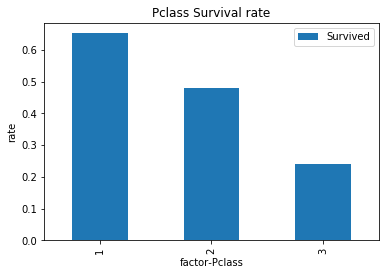

In [22]:
get_result_with_one_factor('Pclass', 'bar')

分析：  
    由上述数据可看出，一等舱乘客的生存率最高，其次是二等舱，最后是三等舱，且趋势显著，因此判定舱室等级可作为影响乘客生还率的一个因素。

#### 判断性别对生存率的影响

        survived  total  survival rate
Sex                                   
female       195    259       0.752896
male          93    453       0.205298


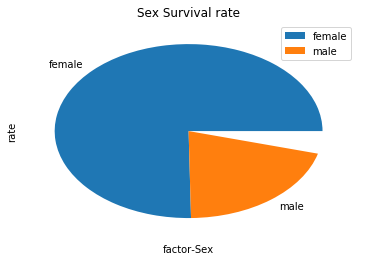

In [23]:
get_result_with_one_factor('Sex', 'pie')

分析：  
    从表中数据可看出，女性生还率大概为75%，男性生还率大概为20%，可见两者之间差距显著，因此性别也可作为衡量影响乘客生还率的一大因素。

#### 判断年龄对生还率的影响

          survived  total  survival rate
Age_df                                  
[0, 10)         38     62       0.612903
[10, 20)        41    102       0.401961
[20, 30)        77    220       0.350000
[30, 40)        72    166       0.433735
[40, 50)        34     89       0.382022
[50, 60)        20     48       0.416667
[60, 70)         5     18       0.277778
[70, 80)         0      6       0.000000
[80, 90)         1      1       1.000000


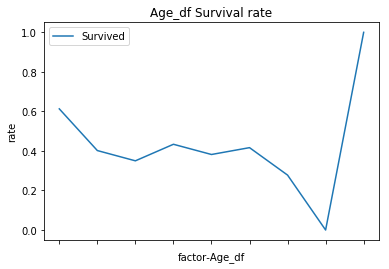

In [24]:
bins = np.arange(0,100,10)
titanic_df['Age_df'] = pd.cut(titanic_df['Age'], bins, right=False)
get_result_with_one_factor('Age_df', 'line')

分析：  
    从数据中可看出，80~90年龄段的生存率最高，为100%，但此年龄段只有一个人，属极端数据，不可作为评判依据；其次0~10岁间的乘客的生存率最高，高达60%，此外其他年龄段间的生存率并未存在明显差异。故年龄不可作为衡量影响乘客生存率的因素。

#### 判断舱室级别以及性别的综合因素对生还率的影响

               survived  total  survival rate
Pclass Sex                                   
1      female        80     83       0.963855
       male          40    101       0.396040
2      female        68     74       0.918919
       male          15     99       0.151515
3      female        47    102       0.460784
       male          38    253       0.150198


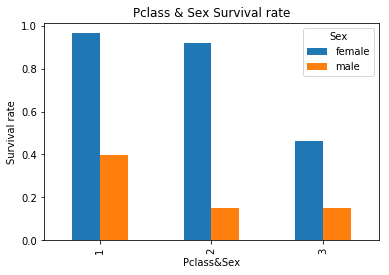

In [25]:
#双因素
factors = list(['Pclass', 'Sex'])
get_result_with_double_factor(factors, 'bar')

分析：  
    由图可得，一等舱的女性生还率大致为96%，二等舱的女性生还率大致为92%；而二等舱男性生还率大致为15%，三等舱的男性生还率大致也在15%。两组数据间差距并不明显，但又存在一趋势：仓位等级高的生还率越高。因此得出判断：乘客无论男女，随仓位等级的提高，乘客的生还率也越高。

### 四、总结

通过此前的分析，大致可得到几点结论：  
* 乘客舱室等级越高级，乘客的生还率越高（与性别无关）
* 女性乘客生还率远远高于男性乘客生还率
* 0~10岁的儿童生还率最高
   舱室级别越高级，代表着乘客的社会地位越高，在灾难发生时有更多的优先权。同时女性乘客及孩童有如此高的生还率，说明在当时事故发生后，船上人员有意识的让女士及儿童先行逃生。  
   通过资料可知，泰坦尼克号上船员加上乘客共有2224人，而数据中只有891人，且对数据进行筛选后仅剩712条，由于不知道样本数据是否是随机选取的，故而无法断言此前结论具有代表性。